Machine Learning Model for predicting traffic flow/density

In [30]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Preprocessing and Feature Selection

In [31]:
df = pd.read_csv('Traffic.csv')

# Convert 'Time' to minutes
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour * 60 + pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.minute

# Preprocessing columns
numeric_features = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']
categorical_features = ['Day of the week']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Include 'Time' in numeric features
        ('cat', OneHotEncoder(), categorical_features)
    ])


X = df.drop("Total", axis='columns')  # Features
y = df["Total"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Fit the Model to the dataset

In [32]:
# Create a pipeline with preprocessing and Linear Regression model
model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time', 'Date', 'CarCount',
                                                   'BikeCount', 'BusCount',
                                                   'TruckCount']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Day of the week'])])),
                ('model', LinearRegression())])

Make predictions on the testing dataset, output MAE performance metric

In [33]:
# Use the pipeline to make predictions on the testing set
predictions = pipeline.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)

print(df.head())
# Display the evaluation metrics
print(f"Mean Absolute Error: {mae}") ##extermely small and means it is very close to actual values in testing set.


   Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0     0    10         Tuesday        31          0         4           4   
1    15    10         Tuesday        49          0         3           3   
2    30    10         Tuesday        46          0         3           6   
3    45    10         Tuesday        51          0         2           5   
4    60    10         Tuesday        57          6        15          16   

   Total Traffic Situation  
0     39               low  
1     55               low  
2     55               low  
3     58               low  
4     94            normal  
Mean Absolute Error: 3.571810012124401e-14


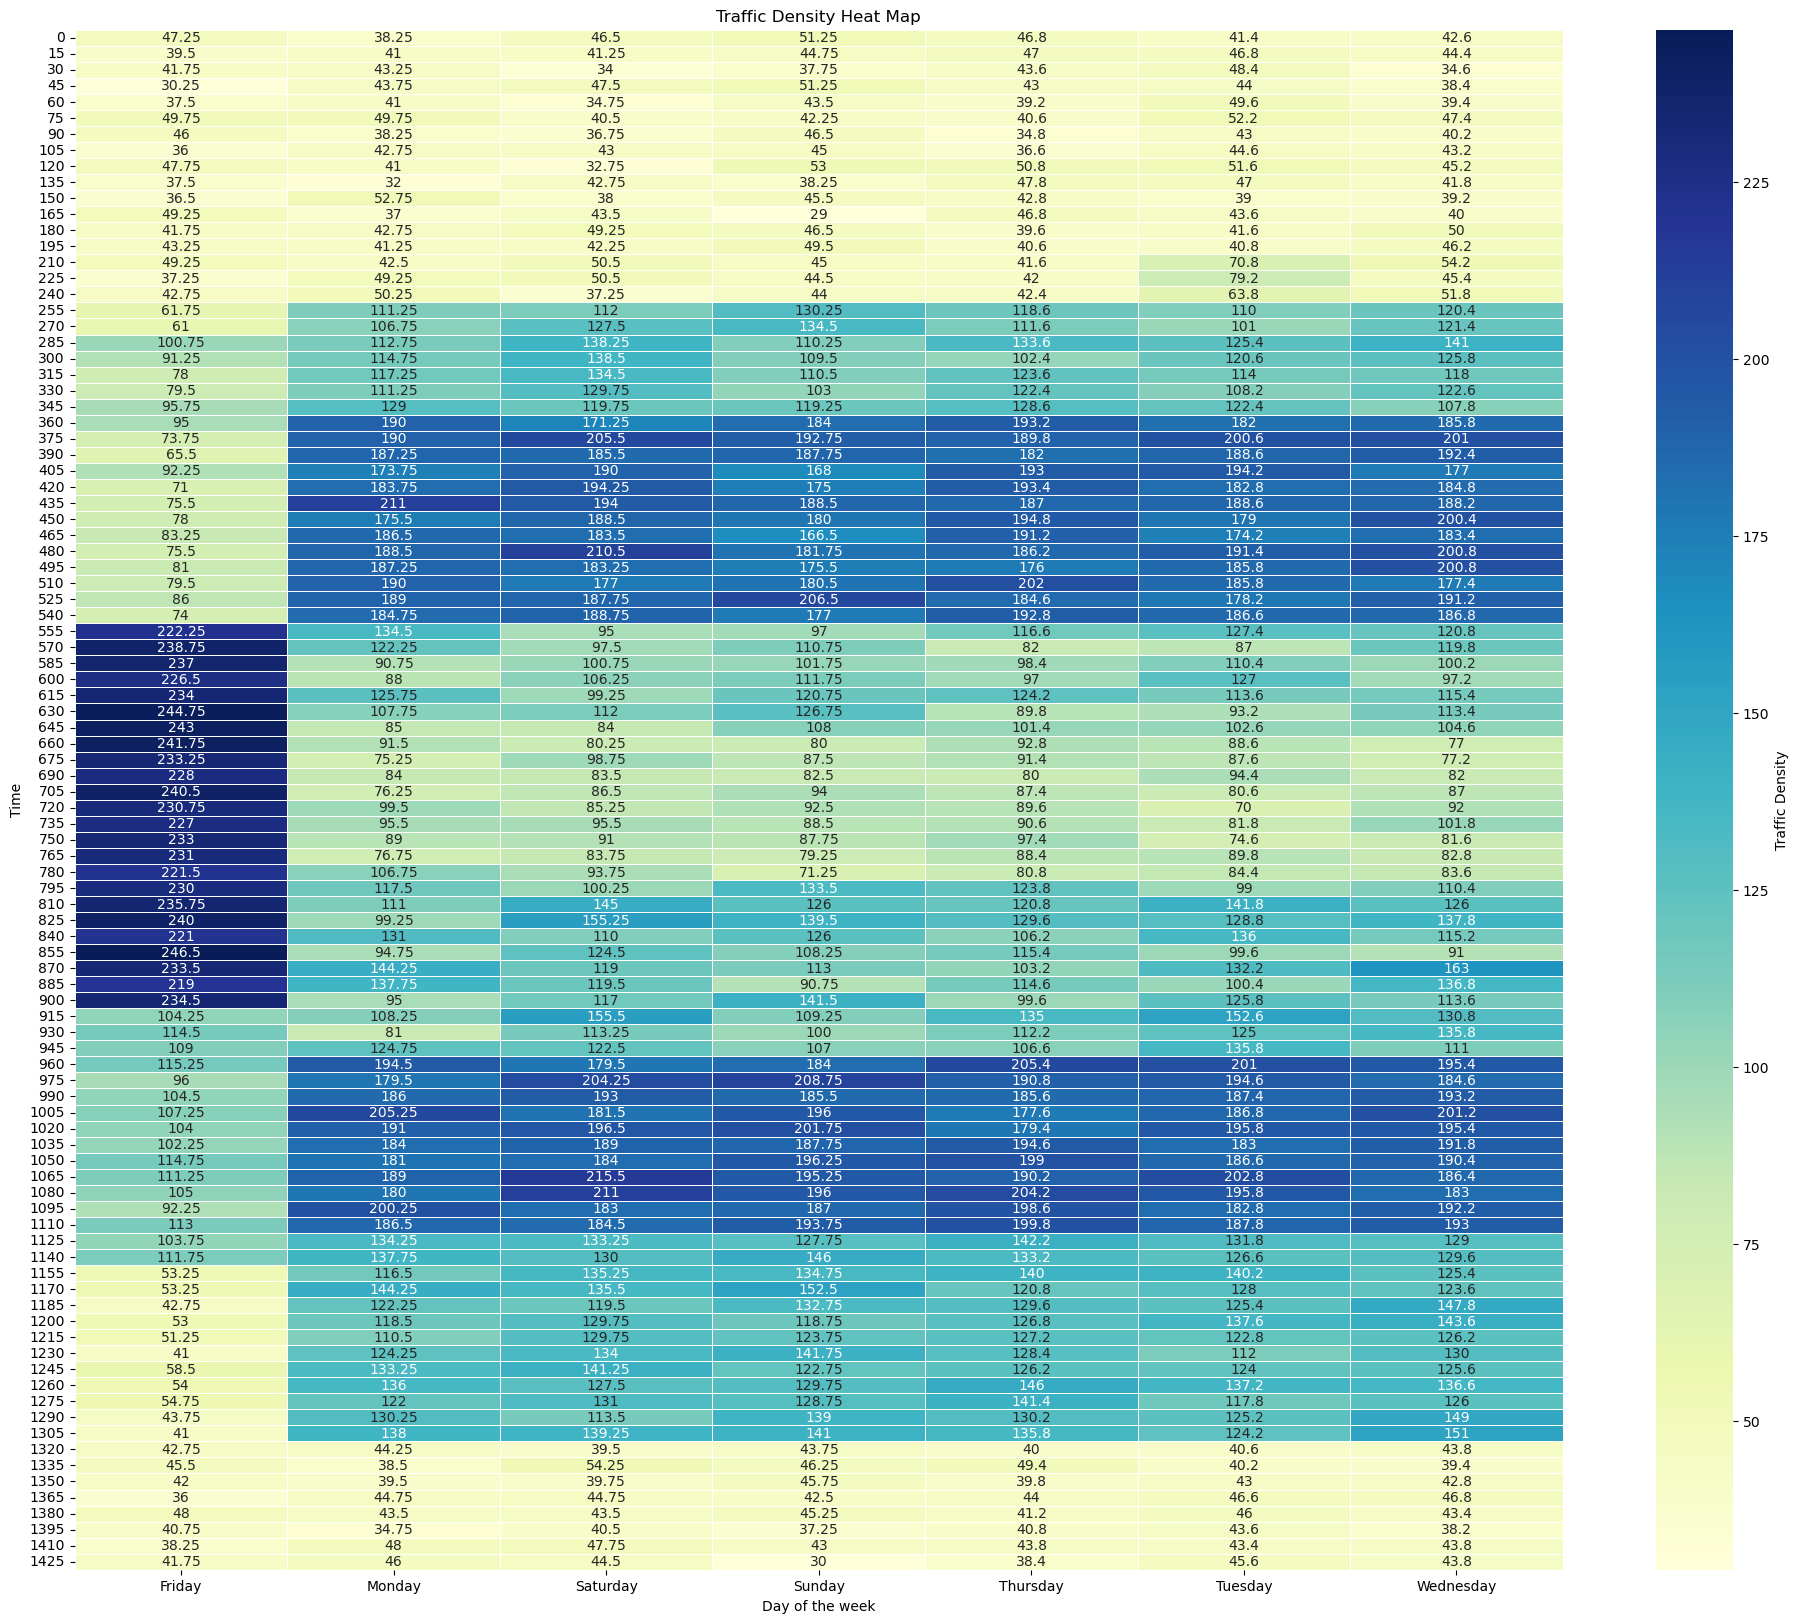

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to rearrange the data for the heat map
pivot_table = df.pivot_table(values='Total', index='Time', columns='Day of the week')

# Create a larger heat map using seaborn
plt.figure(figsize=(24, 20))  # Adjust the figsize here
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Traffic Density'})
plt.title('Traffic Density Heat Map')
plt.show()

